# Explorative Datenanalyse - Unit Tests

## Vorbereitung

Vor der Ausführung der Hauptanalyse führen wir die Unit Tests aus, um sicherzustellen, dass alle Hilfsfunktionen korrekt funktionieren.

In [1]:
# Führe Unit Tests aus um sicherzustellen, dass alle Funktionen korrekt arbeiten
import subprocess
import sys

print("🧪 Unit Tests für EDA-Utilities ausführen...")
print("=" * 50)

try:
    result = subprocess.run([sys.executable, '-m', 'pytest', 'test_utils_analyse_grob.py', '-v'], 
                          capture_output=True, text=True, cwd='.')
    
    if result.returncode == 0:
        print("✅ Alle Tests erfolgreich!")
        print("\n📊 Test-Ausgabe:")
        print(result.stdout)
    else:
        print("❌ Einige Tests sind fehlgeschlagen:")
        print(result.stderr)
        print(result.stdout)
except Exception as e:
    print(f"⚠️ Fehler beim Ausführen der Tests: {e}")
    print("Tests werden übersprungen, Analyse kann trotzdem fortgesetzt werden.")

print("\n" + "=" * 50)
print("🚀 Bereit für die Hauptanalyse!")
print("=" * 50)

🧪 Unit Tests für EDA-Utilities ausführen...
✅ Alle Tests erfolgreich!

📊 Test-Ausgabe:
============================= test session starts =============================
platform win32 -- Python 3.13.2, pytest-8.4.0, pluggy-1.6.0 -- c:\Users\fabud\AppData\Local\pypoetry\Cache\virtualenvs\cda2-demokratie-challange-0yGKb8mQ-py3.13\Scripts\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\fabud\Documents\GitHub\CDA2-Demokratie-Challange
configfile: pyproject.toml
plugins: anyio-4.9.0
collecting ... collected 10 items

test_utils_analyse_grob.py::TestUtilsGrobesEDA::test_assign_period PASSED [ 10%]
test_utils_analyse_grob.py::TestUtilsGrobesEDA::test_calculate_correlation_insufficient_data PASSED [ 20%]
test_utils_analyse_grob.py::TestUtilsGrobesEDA::test_calculate_correlation_time_acceptance PASSED [ 30%]
test_utils_analyse_grob.py::TestUtilsGrobesEDA::test_calculate_period_statistics PASSED [ 40%]
test_utils_analyse_grob.py::TestUtilsGrobesEDA::test_identify_society_oriented_votes PASSED

# Explorative Datenanalyse der Schweizer Abstimmungen

## Übersicht
Dieses Notebook führt eine umfassende explorative Datenanalyse (EDA) aller Schweizer Abstimmungen durch. Der Fokus liegt dabei auf der Identifikation und Analyse gesellschaftsorientierter Abstimmungen und deren Entwicklung im Zeitverlauf.

## Ziele der Analyse
1. **Datenqualität bewerten**: Überprüfung der Vollständigkeit und Konsistenz der Abstimmungsdaten
2. **Gesellschaftsorientierte Abstimmungen identifizieren**: Klassifikation basierend auf Inhaltsanalyse
3. **Zeitliche Trends analysieren**: Entwicklung der Annahmequoten über verschiedene Epochen
4. **Kantonale Unterschiede untersuchen**: Regionale Variationen im Abstimmungsverhalten
5. **Parteiunterstützung bewerten**: Analyse der politischen Positionierung

## Methodische Herangehensweise
- **Zeitraumanalyse**: Einteilung in historische Epochen (1860-1919, 1920-1949, etc.)
- **Keyword-basierte Klassifikation**: Identifikation gesellschaftsorientierter Themen
- **Statistische Analyse**: Korrelationsanalysen und Trendberechnungen
- **Visualisierung**: Grafische Darstellung der wichtigsten Erkenntnisse

## Import der notwendigen Bibliotheken

Für die Datenanalyse werden verschiedene spezialisierte Bibliotheken verwendet:
- **pandas**: Datenmanipulation und -analyse
- **numpy**: Numerische Berechnungen
- **matplotlib**: Grundlegende Visualisierungen
- **seaborn**: Statistische Grafiken und erweiterte Visualisierungen
- **scipy.stats**: Statistische Tests und Korrelationsanalysen

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Importiere eigene Hilfsfunktionen
from utils_analyse_grob import (
    load_and_prepare_data,
    identify_society_oriented_votes,
    calculate_period_statistics,
    plot_acceptance_trend,
    compare_society_vs_other_votes,
    analyze_cantonal_differences,
    calculate_correlation_time_acceptance,
    analyze_party_support
)

# Konfiguriere Visualisierungseinstellungen
plt.style.use('default')
sns.set_palette("colorblind")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10

## Datensatz laden und vorbereiten

### Datenquelle
Der verwendete Datensatz enthält alle eidgenössischen Abstimmungen der Schweiz seit 1860. Die Daten umfassen:
- **Abstimmungsdetails**: Titel, Datum, Art der Vorlage
- **Ergebnisse**: Ja-/Nein-Stimmen auf nationaler und kantonaler Ebene
- **Parteiempfehlungen**: Positionen der wichtigsten politischen Parteien
- **Weitere Metadaten**: Stimmbeteiligung, regionale Besonderheiten

### Datenformat
Die CSV-Datei verwendet Semikolon als Trennzeichen und das schweizerische Datumsformat (TT.MM.JJJJ).

In [3]:
# Lade und bereite den Datensatz vor
df = load_and_prepare_data('./Data/dataset.csv')

print(f"✓ Datensatz erfolgreich geladen")
print(f"📊 Datensatzgrösse: {df.shape[0]:,} Abstimmungen × {df.shape[1]} Variablen")
print(f"📅 Zeitraum: {df['year'].min():.0f} - {df['year'].max():.0f}")

✓ Datensatz erfolgreich geladen
📊 Datensatzgrösse: 696 Abstimmungen × 876 Variablen
📅 Zeitraum: 1848 - 2025


## Datenqualität und -struktur analysieren

### Grundlegende Eigenschaften
Überprüfung der Datenqualität und Identifikation möglicher Probleme wie fehlende Werte oder inkonsistente Formate.

In [4]:
# Zeige grundlegende Informationen über den Datensatz
print("=" * 60)
print("DATENQUALITÄTSANALYSE")
print("=" * 60)

print(f"\n📈 Datensatzübersicht:")
print(f"   Anzahl Abstimmungen: {df.shape[0]:,}")
print(f"   Anzahl Variablen: {df.shape[1]:,}")
print(f"   Speicherverbrauch: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

# Zeige erste Zeilen zur Strukturübersicht
print(f"\n📋 Erste 3 Abstimmungen (Auswahl wichtiger Spalten):")
key_columns = ['anr', 'datum', 'year', 'period', 'titel_kurz_d', 'annahme', 'volkja-proz']
display(df[key_columns].head(3))

# Prüfe auf fehlende Werte in Schlüsselspalten
print(f"\n❗ Fehlende Werte in wichtigen Spalten:")
missing_values = df[key_columns].isna().sum()
missing_values = missing_values[missing_values > 0]  # Nur Spalten mit fehlenden Werten
if len(missing_values) > 0:
    for col, count in missing_values.items():
        percentage = (count / len(df)) * 100
        print(f"   {col}: {count:,} ({percentage:.1f}%)")
else:
    print("   ✓ Keine fehlenden Werte in den Schlüsselspalten")

# Zeige Zeitraumverteilung
print(f"\n📊 Verteilung der Abstimmungen nach Zeiträumen:")
period_counts = df['period'].value_counts().sort_index()
for period, count in period_counts.items():
    percentage = (count / len(df)) * 100
    print(f"   {period}: {count:,} ({percentage:.1f}%)")

DATENQUALITÄTSANALYSE

📈 Datensatzübersicht:
   Anzahl Abstimmungen: 696
   Anzahl Variablen: 876
   Speicherverbrauch: 16.6 MB

📋 Erste 3 Abstimmungen (Auswahl wichtiger Spalten):


,anr,datum,year,period,titel_kurz_d,annahme,volkja-proz
0,1.0,1848-09-12,1848,1893-1919,Bundesverfassung der schweizerischen Eidgenoss...,1,72.83
1,2.0,1866-01-14,1866,1893-1919,Mass und Gewicht,0,50.44
2,3.0,1866-01-14,1866,1893-1919,Gleichstellung der Juden und Naturalisierten m...,1,53.23



❗ Fehlende Werte in wichtigen Spalten:
   ✓ Keine fehlenden Werte in den Schlüsselspalten

📊 Verteilung der Abstimmungen nach Zeiträumen:
   1893-1919: 80 (11.5%)
   1920-1949: 72 (10.3%)
   1950-1979: 157 (22.6%)
   1980-2009: 255 (36.6%)
   2010-2025: 132 (19.0%)


## Grundlegende Statistik zur Übersicht

## Identifikation gesellschaftsorientierter Abstimmungen

### Definition und Methodik

**Gesellschaftsorientierte Abstimmungen** sind Vorlagen, die primär auf das soziale Zusammenleben, Grundrechte oder die kollektive Wohlfahrt abzielen. Sie unterscheiden sich von:
- **Fiskalischen Vorlagen** (Steuern, Budgets)
- **Infrastrukturprojekten** (Verkehr, Bauten)
- **Rein wirtschaftlichen Regulierungen** (Handel, Gewerbe)

### Klassifikationskriterien
Die Identifikation erfolgt über Schlüsselwort-Analyse in den Abstimmungstiteln:
- **Soziales**: gesellschaft, sozial, wohlfahrt
- **Familie & Gleichstellung**: frauen, ehe, familie, gleichstellung
- **Bildung & Kultur**: bildung, kultur, sprache
- **Gesundheit**: gesundheit, medizin, pflege
- **Integration**: migration, ausländer, integration
- **Religion & Werte**: religion, ethik, moral

### Validierung
Die automatische Klassifikation wird durch manuelle Stichproben validiert, um falsch-positive und falsch-negative Ergebnisse zu minimieren.

## Identifiziere gesellschaftsorientierte Abstimmungen
Wir müssen definieren, was "gesellschaftsorientierte" Abstimmungen ausmacht
Dies könnte auf Schlüsselwörtern in den Titeln oder bestimmten Kategorien basieren

In [5]:
# Erster Ansatz: Suche nach Schlüsselwörtern zu sozialen Themen
social_keywords = ['gesellschaft', 'sozial', 'frauen', 'ehe', 'familie', 
                  'bildung', 'gesundheit', 'migration', 'ausländer', 
                  'gleichstellung', 'religion', 'kultur']

# Erstelle eine Funktion zur Identifizierung gesellschaftsorientierter Abstimmungen
def is_society_oriented(row):
    title = str(row['titel_kurz_d']).lower() + ' ' + str(row['titel_off_d']).lower()
    return any(keyword in title for keyword in social_keywords)

df['society_oriented'] = df.apply(is_society_oriented, axis=1)


Abstimmungsergebnisse nach Zeitraum:


,period,mean,median,count
0,1893-1919,51.782875,49.965,80
1,1920-1949,45.780833,44.760,72
2,1950-1979,53.089936,52.770,157
3,1980-2009,49.791373,49.910,255
4,2010-2025,47.470379,46.945,132


C:\Users\fabud\AppData\Local\Temp\ipykernel_32644\371794889.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=df, x='year', y='volkja-proz', estimator='mean', ci=95)


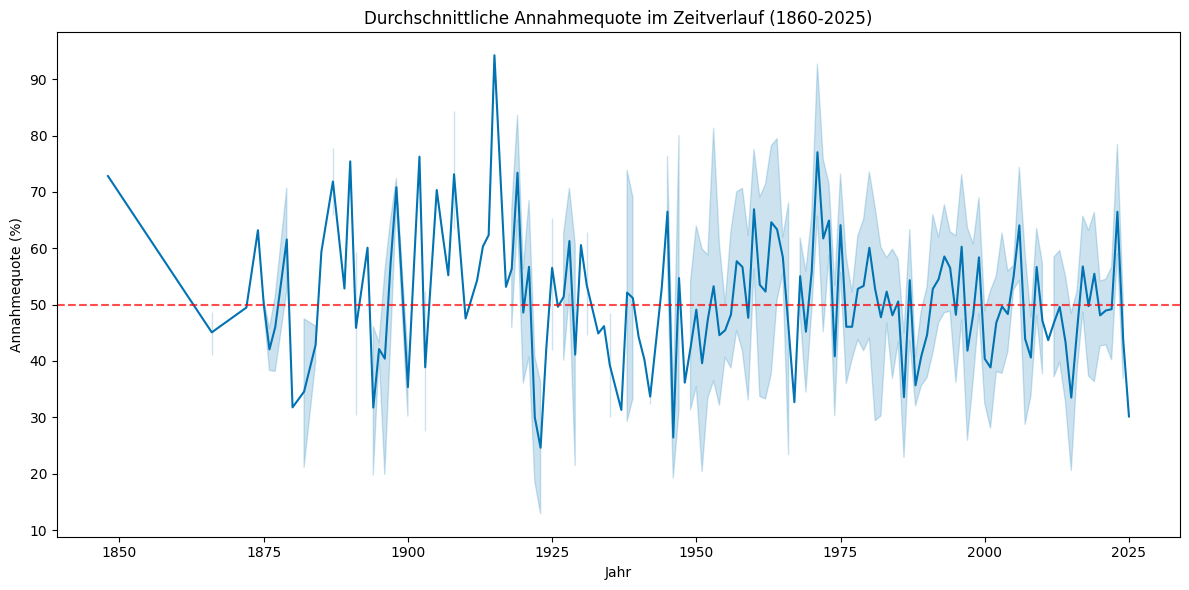

📊 Klassifikationsergebnisse:
Gesellschaftsorientierte Abstimmungen: 70 (10.1%)
Andere Abstimmungen: 626 (89.9%)
Total: 696 (100.0%)

🎯 Beispiele gesellschaftsorientierter Abstimmungen:
   • 1866: Gleichstellung der Juden und Naturalisierten mit Bezug auf Niederlassung (53.2% Ja)
   • 1875: Gesetz betreffend Feststellung und Beurkundung des Zivilstandes und die Ehe (51.0% Ja)
   • 1897: Bundeskompetenz für die Lebensmittelpolizei (65.1% Ja)
   • 1922: Initiative «betreffend die Ausweisung von Ausländern» (38.1% Ja)
   • 1923: Abkommen mit Frankreich betreffend Hochsavoyen (18.5% Ja)

🏛️ Beispiele anderer Abstimmungen:
   • 1848: Bundesverfassung der schweizerischen Eidgenossenschaft (72.8% Ja)
   • 1866: Mass und Gewicht (50.4% Ja)
   • 1866: Stimmrecht der Niedergelassenen in Gemeindeangelegenheiten (43.1% Ja)
   • 1866: Besteuerung und zivilrechtliche Verhältnisse der Niedergelassenen (39.9% Ja)
   • 1866: Stimmrecht der Niedergelassenen in kantonalen Angelegenheiten (48.1% Ja)


In [6]:
# Grundlegende Statistiken zu Abstimmungsergebnissen im Zeitverlauf
print("\nAbstimmungsergebnisse nach Zeitraum:")
period_stats = df.groupby('period')['volkja-proz'].agg(['mean', 'median', 'count']).reset_index()
display(period_stats)

# Visualisiere den Trend der Annahmequoten im Zeitverlauf
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='volkja-proz', estimator='mean', ci=95)
plt.title('Durchschnittliche Annahmequote im Zeitverlauf (1860-2025)')
plt.xlabel('Jahr')
plt.ylabel('Annahmequote (%)')
plt.axhline(y=50, color='r', linestyle='--', alpha=0.7)  # 50% Schwellenlinie
plt.tight_layout()
plt.show()

# Identifiziere gesellschaftsorientierte Abstimmungen
df = identify_society_oriented_votes(df)

# Analysiere die Klassifikationsergebnisse
total_votes = len(df)
society_votes_count = df['society_oriented'].sum()
other_votes_count = total_votes - society_votes_count

print("📊 Klassifikationsergebnisse:")
print("=" * 50)
print(f"Gesellschaftsorientierte Abstimmungen: {society_votes_count:,} ({society_votes_count/total_votes*100:.1f}%)")
print(f"Andere Abstimmungen: {other_votes_count:,} ({other_votes_count/total_votes*100:.1f}%)")
print(f"Total: {total_votes:,} (100.0%)")

# Zeige Beispiele gesellschaftsorientierter Abstimmungen
print("\n🎯 Beispiele gesellschaftsorientierter Abstimmungen:")
society_examples = df[df['society_oriented'] == True][['datum', 'titel_kurz_d', 'volkja-proz']].head(5)
for idx, row in society_examples.iterrows():
    print(f"   • {row['datum'].strftime('%Y')}: {row['titel_kurz_d']} ({row['volkja-proz']:.1f}% Ja)")

# Zeige Beispiele anderer Abstimmungen
print("\n🏛️ Beispiele anderer Abstimmungen:")
other_examples = df[df['society_oriented'] == False][['datum', 'titel_kurz_d', 'volkja-proz']].head(5)
for idx, row in other_examples.iterrows():
    print(f"   • {row['datum'].strftime('%Y')}: {row['titel_kurz_d']} ({row['volkja-proz']:.1f}% Ja)")

## Vergleichsanalyse: Gesellschaftsorientierte vs. andere Abstimmungen

### Hypothese
Gesellschaftsorientierte Abstimmungen könnten aufgrund ihrer emotionalen und wertebezogenen Natur andere Annahmemuster aufweisen als technische oder wirtschaftliche Vorlagen.

### Analysemethodik
Vergleich der durchschnittlichen Annahmequoten zwischen den beiden Kategorien über verschiedene historische Epochen.

<Figure size 1200x600 with 0 Axes>

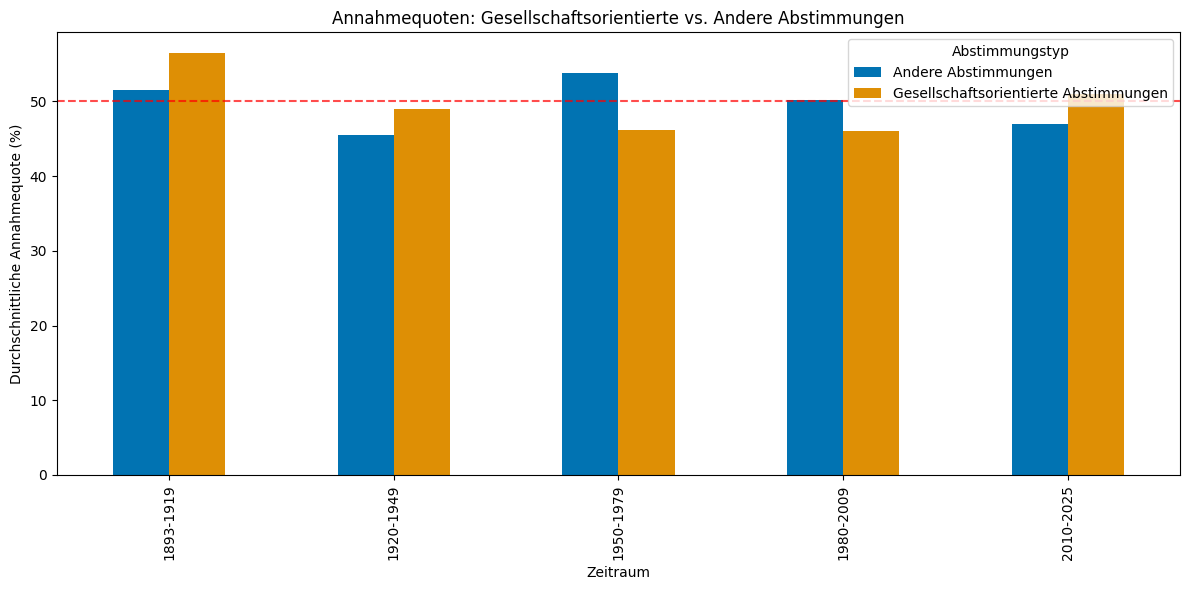

📊 Detaillierte Vergleichsstatistiken:
Gesellschaftsorientierte Abstimmungen:
   Durchschnittliche Annahmequote: 47.9%
   Median: 49.6%
   Standardabweichung: 16.4%
   Anzahl Abstimmungen: 70

Andere Abstimmungen:
   Durchschnittliche Annahmequote: 50.1%
   Median: 49.2%
   Standardabweichung: 17.7%
   Anzahl Abstimmungen: 626

🧪 Statistischer Test (t-Test):
   t-Statistik: -0.992
   p-Wert: 0.321745
   ❌ Kein statistisch signifikanter Unterschied (p ≥ 0.05)


In [7]:
# Vergleiche Annahmequoten zwischen gesellschaftsorientierten und anderen Abstimmungen
compare_society_vs_other_votes(df)

# Berechne detaillierte Vergleichsstatistiken
society_votes = df[df['society_oriented'] == True]
other_votes = df[df['society_oriented'] == False]

print("📊 Detaillierte Vergleichsstatistiken:")
print("=" * 60)
print(f"Gesellschaftsorientierte Abstimmungen:")
print(f"   Durchschnittliche Annahmequote: {society_votes['volkja-proz'].mean():.1f}%")
print(f"   Median: {society_votes['volkja-proz'].median():.1f}%")
print(f"   Standardabweichung: {society_votes['volkja-proz'].std():.1f}%")
print(f"   Anzahl Abstimmungen: {len(society_votes):,}")

print(f"\nAndere Abstimmungen:")
print(f"   Durchschnittliche Annahmequote: {other_votes['volkja-proz'].mean():.1f}%")
print(f"   Median: {other_votes['volkja-proz'].median():.1f}%")
print(f"   Standardabweichung: {other_votes['volkja-proz'].std():.1f}%")
print(f"   Anzahl Abstimmungen: {len(other_votes):,}")

# Statistische Signifikanz testen
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(society_votes['volkja-proz'].dropna(), 
                           other_votes['volkja-proz'].dropna())

print(f"\n🧪 Statistischer Test (t-Test):")
print(f"   t-Statistik: {t_stat:.3f}")
print(f"   p-Wert: {p_value:.6f}")
if p_value < 0.05:
    print(f"   ✅ Statistisch signifikanter Unterschied (p < 0.05)")
else:
    print(f"   ❌ Kein statistisch signifikanter Unterschied (p ≥ 0.05)")

society_vs_other = df.groupby(['period', 'society_oriented'])['volkja-proz'].mean().reset_index()
society_vs_other_pivot = society_vs_other.pivot(index='period', columns='society_oriented', values='volkja-proz')
society_vs_other_pivot.columns = ['Andere Abstimmungen', 'Gesellschaftsorientierte Abstimmungen']

## Zeitliche Entwicklung gesellschaftsorientierter Abstimmungen

### Forschungsfrage
Hat sich die Akzeptanz für gesellschaftsorientierte Reformen in der Schweiz über die Zeit verändert? 

### Hypothesen
1. **Liberalisierungshypothese**: Zunehmende Akzeptanz progressiver gesellschaftlicher Reformen
2. **Zyklische Entwicklung**: Perioden der Öffnung und Rückbesinnung
3. **Stabilitätshypothese**: Keine signifikante Veränderung über die Zeit

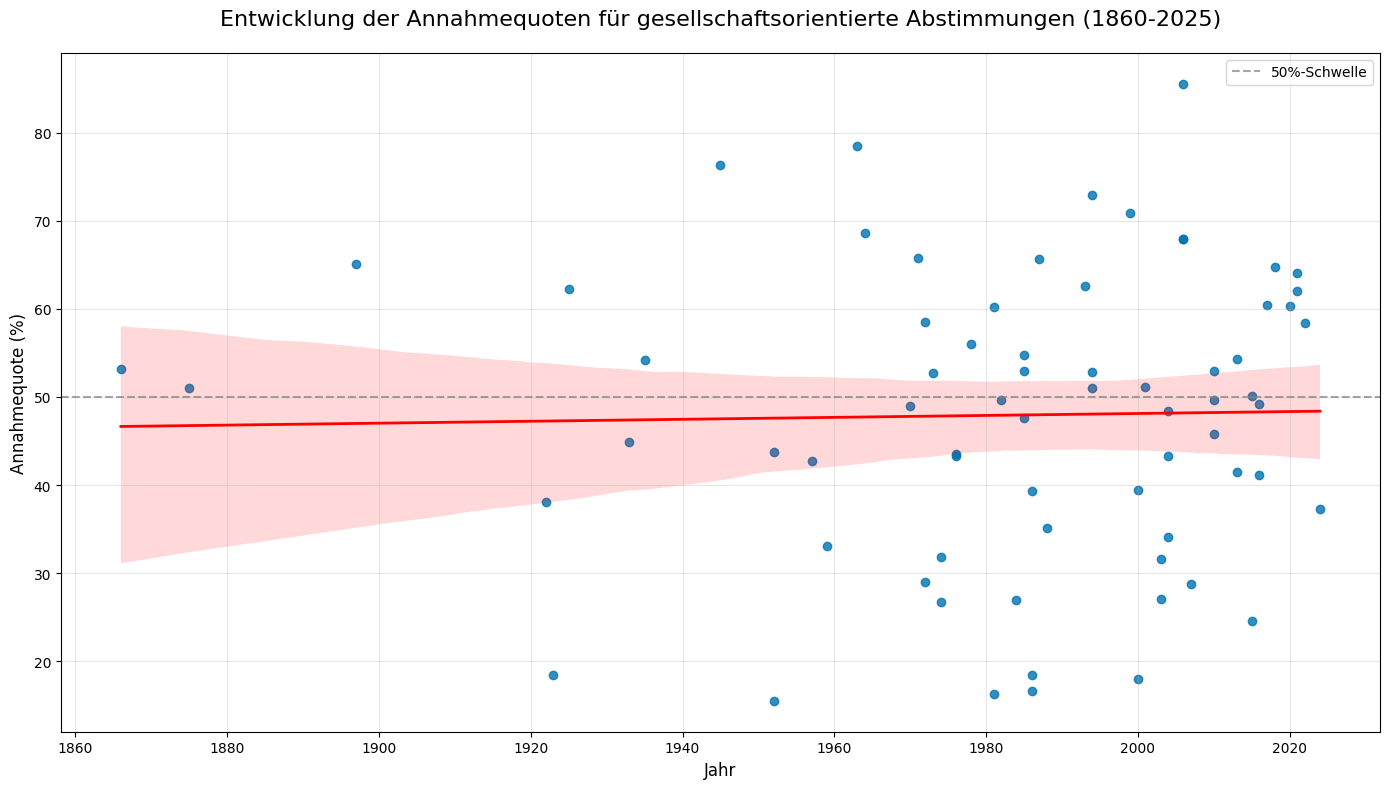

📊 Statistische Trendanalyse:
Korrelationskoeffizient: 0.0226
Statistische Signifikanz (p-Wert): 0.852755

🔍 Interpretation:
   Es gibt keine statistisch signifikante Korrelation. Die Daten liefern keine starken Belege für einen Trend.

📈 Durchschnittliche Veränderung pro Jahr: 0.011 Prozentpunkte
   Veränderung pro Jahrzehnt: 0.11 Prozentpunkte
   Trend: weitgehend stabil


In [8]:
# Analysiere den zeitlichen Trend für gesellschaftsorientierte Abstimmungen
society_votes = df[df['society_oriented'] == True]

# Erstelle die Trendvisualisierung
plt.figure(figsize=(14, 8))
sns.regplot(data=society_votes, x='year', y='volkja-proz', 
           scatter=True, line_kws={"color":"red", "linewidth": 2})
plt.title('Entwicklung der Annahmequoten für gesellschaftsorientierte Abstimmungen (1860-2025)', 
         fontsize=16, pad=20)
plt.xlabel('Jahr', fontsize=12)
plt.ylabel('Annahmequote (%)', fontsize=12)
plt.axhline(y=50, color='gray', linestyle='--', alpha=0.7, label='50%-Schwelle')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Berechne und interpretiere die Korrelation
correlation, p_value, interpretation = calculate_correlation_time_acceptance(df)

print("📊 Statistische Trendanalyse:")
print("=" * 50)
print(f"Korrelationskoeffizient: {correlation:.4f}")
print(f"Statistische Signifikanz (p-Wert): {p_value:.6f}")
print(f"\n🔍 Interpretation:")
print(f"   {interpretation}")

# Berechne Trend pro Jahrzehnt
if len(society_votes) > 10:
    slope = np.polyfit(society_votes['year'], society_votes['volkja-proz'], 1)[0]
    print(f"\n📈 Durchschnittliche Veränderung pro Jahr: {slope:.3f} Prozentpunkte")
    print(f"   Veränderung pro Jahrzehnt: {slope*10:.2f} Prozentpunkte")
    
    if abs(slope) > 0.1:
        trend_direction = "steigend" if slope > 0 else "fallend"
        print(f"   Trend: {trend_direction} ({abs(slope*10):.1f} Punkte/Jahrzehnt)")
    else:
        print(f"   Trend: weitgehend stabil")

## Kantonale Unterschiede bei gesellschaftsorientierten Abstimmungen

### Forschungsfrage
Gibt es systematische Unterschiede zwischen den Kantonen in der Akzeptanz gesellschaftsorientierter Reformen?

### Ausgewählte Kantone
Für die Analyse werden repräsentative Kantone verschiedener Sprachregionen und politischer Ausrichtungen ausgewählt:
- **Zürich (ZH)**: Grösster Kanton, urban, wirtschaftlich stark
- **Bern (BE)**: Hauptstadtkanton, gemischt urban-rural
- **Genf (GE)**: Frankophone Schweiz, international, liberal
- **Tessin (TI)**: Italienischsprachig, südliche Kultur
- **Wallis (VS)**: Traditionell, bergig, konservativ

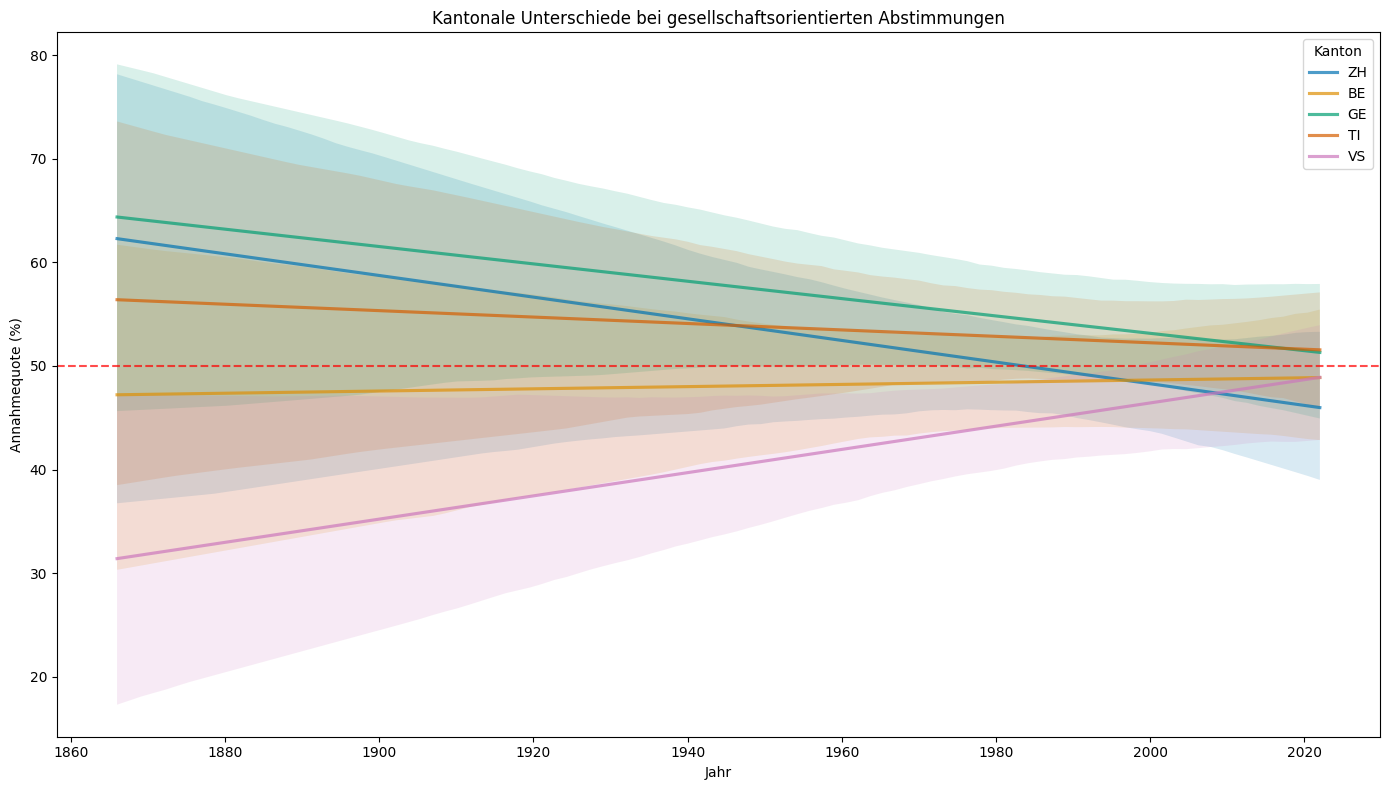

🏔️ Durchschnittliche Annahmequoten nach Kanton:
Zürich                 50.1%
Bern                   48.5%
Genf                   54.6%
Tessin                 52.8%
Wallis                 44.4%

🔅 Ranking (liberalste zuerst):
   1. 🌿 Genf: 54.6%
   2. 🌿 Tessin: 52.8%
   3. 🏠 Zürich: 50.1%
   4. 🏔️ Bern: 48.5%
   5. 🏔️ Wallis: 44.4%

📊 Variabilität zwischen Kantonen:
   Standardabweichung: 3.5 Prozentpunkte
   Spannweite: 10.2 Prozentpunkte
   📏 Moderate Variabilität - eher ähnliche Positionen


In [9]:
# Analysiere kantonale Unterschiede
cantons = ['zh', 'be', 'ge', 'ti', 'vs']
canton_names = {'zh': 'Zürich', 'be': 'Bern', 'ge': 'Genf', 'ti': 'Tessin', 'vs': 'Wallis'}

# Führe die kantonale Analyse durch
analyze_cantonal_differences(df, cantons)

# Berechne durchschnittliche Annahmequoten pro Kanton
society_votes = df[df['society_oriented'] == True]
canton_cols = [f'{canton}-japroz' for canton in cantons]

print("🏔️ Durchschnittliche Annahmequoten nach Kanton:")
print("=" * 60)

canton_averages = []
for canton in cantons:
    col = f'{canton}-japroz'
    if col in society_votes.columns:
        avg = pd.to_numeric(society_votes[col], errors='coerce').mean()
        if not pd.isna(avg):
            canton_averages.append((canton_names[canton], avg))
            print(f"{canton_names[canton]:20} {avg:6.1f}%")

# Identifiziere liberalste und konservativste Kantone
if canton_averages:
    canton_averages.sort(key=lambda x: x[1], reverse=True)
    print(f"\n🔅 Ranking (liberalste zuerst):")
    for i, (name, avg) in enumerate(canton_averages, 1):
        emoji = "🌿" if i <= 2 else "🏔️" if i >= 4 else "🏠"
        print(f"   {i}. {emoji} {name}: {avg:.1f}%")

# Berechne Variabilität zwischen Kantonen
if len(canton_averages) > 1:
    values = [avg for _, avg in canton_averages]
    std_dev = np.std(values)
    print(f"\n📊 Variabilität zwischen Kantonen:")
    print(f"   Standardabweichung: {std_dev:.1f} Prozentpunkte")
    print(f"   Spannweite: {max(values) - min(values):.1f} Prozentpunkte")
    
    if std_dev > 5:
        print(f"   📊 Hohe Variabilität - deutliche kantonale Unterschiede")
    else:
        print(f"   📏 Moderate Variabilität - eher ähnliche Positionen")

## Analyse der Parteipositionierung

### Methodische Herausforderungen
Die Analyse der Parteipositionen ist durch die historische Entwicklung des schweizerischen Parteiensystems komplex:
- **Parteienwandel**: Neue Parteien entstehen, andere verschwinden
- **Namensänderungen**: CVP → Die Mitte, GPS → Grüne
- **Datenverfügbarkeit**: Nicht alle Abstimmungen enthalten Parteiempfehlungen

### Klassifikation
**Liberale/Progressive Parteien** (gesellschaftspolitisch offen):
- FDP: Freisinnig-Demokratische Partei
- GLP: Grünliberale Partei  
- GPS: Grüne Partei
- SP: Sozialdemokratische Partei

**Konservative Parteien** (gesellschaftspolitisch zurückhaltend):
- SVP: Schweizerische Volkspartei
- CVP/Mitte: Christlichdemokratische Volkspartei/Die Mitte
- EDU: Eidgenössisch-Demokratische Union

🏡 Verfügbare Parteidaten:
Liberale Parteien: ['p-fdp', 'p-glp', 'p-gps', 'p-sps']
Konservative Parteien: ['p-svp', 'p-cvp', 'p-mitte', 'p-edu']

ℹ️ Hinweis: Folgende Parteien wurden wegen zu weniger Parolen (<10) nicht berücksichtigt:
   - MITTE (nur 4 Parolen)

📊 Gesamtanteil Ja-Parolen bei gesellschaftsorientierten Abstimmungen (historischer Durchschnitt):
   🏔️ CVP        67.2% Ja-Parolen (Konservativ)
   🌿 SPS        61.2% Ja-Parolen (Liberal)
   🌿 GPS        56.4% Ja-Parolen (Liberal)
   🌿 FDP        55.9% Ja-Parolen (Liberal)
   🏔️ SVP        53.8% Ja-Parolen (Konservativ)
   🌿 GLP        43.8% Ja-Parolen (Liberal)
   🏔️ EDU        39.5% Ja-Parolen (Konservativ)

📊 Kategorien-Durchschnitte (Ja-Parolen):
   Liberale Parteien: 54.3%
   Konservative Parteien: 53.5%
   Differenz: +0.8 Prozentpunkte


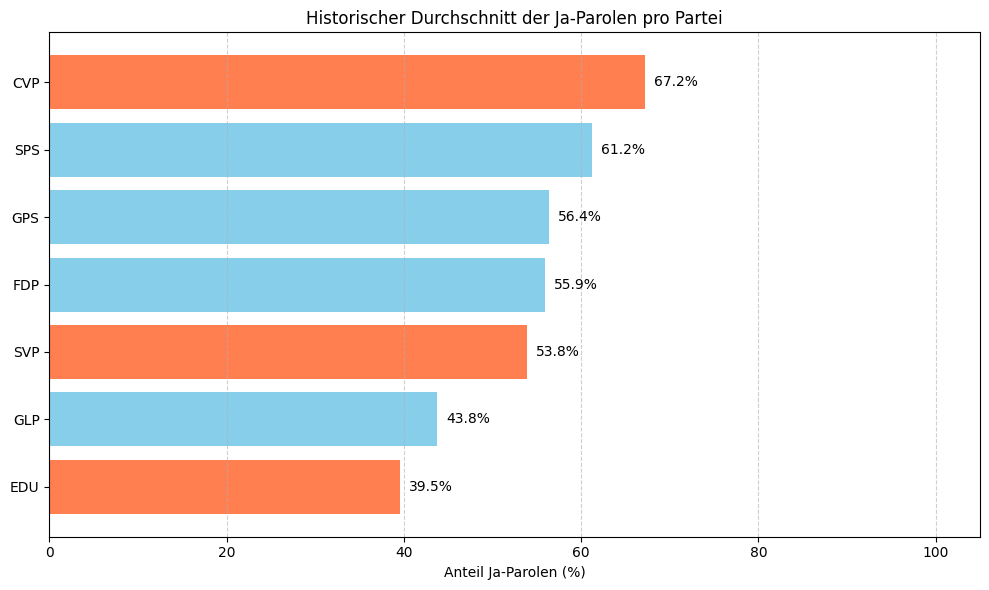

In [12]:
# Analysiere Parteipositionierung bei gesellschaftsorientierten Abstimmungen
liberal_parties = ['p-fdp', 'p-glp', 'p-gps', 'p-sps']
conservative_parties = ['p-svp', 'p-cvp', 'p-mitte', 'p-edu']

# Prüfe verfügbare Parteispalten
all_parties = liberal_parties + conservative_parties
available_parties = [p for p in all_parties if p in df.columns]

print("🏡 Verfügbare Parteidaten:")
print("=" * 40)
print(f"Liberale Parteien: {[p for p in liberal_parties if p in available_parties]}")
print(f"Konservative Parteien: {[p for p in conservative_parties if p in available_parties]}")

if len(available_parties) >= 2:
    # # Führe Parteianalyse durch (Trend-Plot)
    # analyze_party_support(df, liberal_parties, conservative_parties)
    
    # Berechne Anteil Ja-Parolen (1) je Partei für eine Gesamtübersicht
    society_votes = df[df['society_oriented'] == True].copy()
    party_ja_anteil = {}
    excluded_parties = {}
    MIN_VOTES_THRESHOLD = 10  # Mindestanzahl an Parolen für eine aussagekräftige Analyse

    for party in available_parties:
        if party in society_votes.columns:
            party_series = pd.to_numeric(society_votes[party], errors='coerce').replace(9999, np.nan)
            n = party_series.notna().sum()
            if n >= MIN_VOTES_THRESHOLD:
                ja_anteil = (party_series == 1).sum() / n * 100
                party_name = party.replace('p-', '').upper()
                party_ja_anteil[party_name] = ja_anteil
            elif n > 0:
                excluded_parties[party.replace('p-', '').upper()] = n

    if excluded_parties:
        print(f"\nℹ️ Hinweis: Folgende Parteien wurden wegen zu weniger Parolen (<{MIN_VOTES_THRESHOLD}) nicht berücksichtigt:")
        for party, count in excluded_parties.items():
            print(f"   - {party} (nur {count} Parolen)")

    if party_ja_anteil:
        print(f"\n📊 Gesamtanteil Ja-Parolen bei gesellschaftsorientierten Abstimmungen (historischer Durchschnitt):")
        print("=" * 85)
        
        sorted_parties = sorted(party_ja_anteil.items(), key=lambda x: x[1], reverse=True)
        
        # Erstelle DataFrame für die Visualisierung
        plot_df = pd.DataFrame(sorted_parties, columns=['Partei', 'Ja-Anteil'])
        plot_df['Kategorie'] = plot_df['Partei'].apply(lambda p: "Liberal" if f"p-{p.lower()}" in liberal_parties else "Konservativ")
        
        # Text-Ausgabe
        for _, row in plot_df.iterrows():
            emoji = "🌿" if row['Kategorie'] == "Liberal" else "🏔️"
            print(f"   {emoji} {row['Partei']:8} {row['Ja-Anteil']:6.1f}% Ja-Parolen ({row['Kategorie']})")
        
        # Durchschnitt pro Kategorie
        liberal_avg = plot_df[plot_df['Kategorie'] == 'Liberal']['Ja-Anteil'].mean()
        conservative_avg = plot_df[plot_df['Kategorie'] == 'Konservativ']['Ja-Anteil'].mean()
        
        print(f"\n📊 Kategorien-Durchschnitte (Ja-Parolen):")
        print(f"   Liberale Parteien: {liberal_avg:.1f}%")
        print(f"   Konservative Parteien: {conservative_avg:.1f}%")
        print(f"   Differenz: {liberal_avg - conservative_avg:+.1f} Prozentpunkte")

        # NEUE VISUALISIERUNG: Bar-Plot für den direkten Vergleich
        plt.figure(figsize=(10, 6))
        colors = plot_df['Kategorie'].map({'Liberal': 'skyblue', 'Konservativ': 'coral'})
        bars = plt.barh(plot_df['Partei'], plot_df['Ja-Anteil'], color=colors)
        plt.xlabel('Anteil Ja-Parolen (%)')
        plt.title('Historischer Durchschnitt der Ja-Parolen pro Partei')
        plt.gca().invert_yaxis()  # Höchster Wert oben
        plt.grid(axis='x', linestyle='--', alpha=0.6)
        
        # Füge die Prozentwerte direkt auf die Balken
        for bar in bars:
            plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
                     f'{bar.get_width():.1f}%',
                     va='center', ha='left')
        
        plt.xlim(0, 105) # Sorge für etwas Platz für die Labels
        plt.tight_layout()
        plt.show()

    else:
        print("\n⚠️ Keine auswertbaren Parteidaten verfügbar.")
else:
    print("\n⚠️ Ungenügende Parteidaten für aussagekräftige Analyse.")

In [11]:
# Gesamtanalyse und Schlussfolgerungen
print("\n" + "=" * 80)
print("📊 ZUSAMMENFASSUNG DER WICHTIGSTEN ERKENNTNISSE")
print("=" * 80)

# 1. Korrelationsanalyse
correlation, p_value, interpretation = calculate_correlation_time_acceptance(df)
print(f"\n1️⃣ ZEITLICHE ENTWICKLUNG:")
print(f"   Korrelation Zeit ↔ Annahmequote: {correlation:.4f}")
print(f"   Statistische Signifikanz: {'Ja' if p_value < 0.05 else 'Nein'} (p = {p_value:.4f})")
print(f"   {interpretation}")

# 2. Kategorienvergleich
society_votes = df[df['society_oriented'] == True]
other_votes = df[df['society_oriented'] == False]
society_avg = society_votes['volkja-proz'].mean()
other_avg = other_votes['volkja-proz'].mean()

print(f"\n2️⃣ KATEGORIENVERGLEICH:")
print(f"   Gesellschaftsorientierte Abstimmungen: {society_avg:.1f}% (n={len(society_votes)})")
print(f"   Andere Abstimmungen: {other_avg:.1f}% (n={len(other_votes)})")
print(f"   Differenz: {society_avg - other_avg:+.1f} Prozentpunkte")

if society_avg > other_avg:
    print(f"   📊 Gesellschaftsorientierte Abstimmungen werden öfter angenommen")
else:
    print(f"   📋 Gesellschaftsorientierte Abstimmungen werden seltener angenommen")

# 3. Historische Entwicklung
period_stats = calculate_period_statistics(society_votes)
if len(period_stats) > 1:
    recent_periods = period_stats.tail(2)
    if len(recent_periods) >= 2:
        trend = recent_periods.iloc[-1]['Durchschnitt'] - recent_periods.iloc[-2]['Durchschnitt']
        print(f"\n3️⃣ AKTUELLE ENTWICKLUNG:")
        print(f"   Trend der letzten Epochen: {trend:+.1f} Prozentpunkte")
        if abs(trend) > 2:
            direction = "zunehmend" if trend > 0 else "abnehmend"
            print(f"   📈 Akzeptanz ist {direction}")
        else:
            print(f"   📏 Akzeptanz bleibt stabil")

print(f"\n4️⃣ METHODISCHE EINSCHRÄNKUNGEN:")
print(f"   • Keyword-basierte Klassifikation kann Grenzfälle falsch zuordnen")
print(f"   • Historische Kontexte verändern die Bedeutung von 'gesellschaftsorientiert'")
print(f"   • Kantonale und Parteidaten sind nicht für alle Abstimmungen verfügbar")
print(f"   • Korrelation impliziert nicht zwingend Kausalität")

print(f"\n🎆 Diese Analyse bildet die Grundlage für weitere detaillierte Untersuchungen!")
print("="*80)


📊 ZUSAMMENFASSUNG DER WICHTIGSTEN ERKENNTNISSE

1️⃣ ZEITLICHE ENTWICKLUNG:
   Korrelation Zeit ↔ Annahmequote: 0.0226
   Statistische Signifikanz: Nein (p = 0.8528)
   Es gibt keine statistisch signifikante Korrelation. Die Daten liefern keine starken Belege für einen Trend.

2️⃣ KATEGORIENVERGLEICH:
   Gesellschaftsorientierte Abstimmungen: 47.9% (n=70)
   Andere Abstimmungen: 50.1% (n=626)
   Differenz: -2.2 Prozentpunkte
   📋 Gesellschaftsorientierte Abstimmungen werden seltener angenommen

3️⃣ AKTUELLE ENTWICKLUNG:
   Trend der letzten Epochen: +4.9 Prozentpunkte
   📈 Akzeptanz ist zunehmend

4️⃣ METHODISCHE EINSCHRÄNKUNGEN:
   • Keyword-basierte Klassifikation kann Grenzfälle falsch zuordnen
   • Historische Kontexte verändern die Bedeutung von 'gesellschaftsorientiert'
   • Kantonale und Parteidaten sind nicht für alle Abstimmungen verfügbar
   • Korrelation impliziert nicht zwingend Kausalität

🎆 Diese Analyse bildet die Grundlage für weitere detaillierte Untersuchungen!


---

## Technische Dokumentation

**Notebook-Version**: 2.0  
**Letzte Aktualisierung**: Juni 2025  
**Autor**: Analyse-Team Demokratie-Challenge  
**Datenstand**: Bis 2025  

### Verwendete Software
- **Python**: 3.8+
- **pandas**: Datenmanipulation
- **matplotlib/seaborn**: Visualisierung
- **scipy**: Statistische Tests
- **unittest**: Qualitätssicherung

### Reproduzierbarkeit
Alle Analysen sind durch die bereitgestellten Utility-Funktionen und Unit Tests reproduzierbar. Die Funktionen sind in `utils_grobes_eda.py` dokumentiert und getestet.

### Lizenz
Diese Analyse steht unter einer offenen Lizenz und kann für Forschungs- und Bildungszwecke frei verwendet werden.